In [1]:
#importing that cool shit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

In [2]:
#importing the data
df=pd.read_csv('housing.csv')
print (df.head())
print(df.dtypes)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             float64
latitude              float64
housing_median_

In [3]:
print (df.ocean_proximity.unique())
print (df.isnull().sum())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
#some of the data is missing from the total_bedrooms columns 
mean=np.mean(df['total_bedrooms'])
df.total_bedrooms.fillna(mean,inplace=True)
#checking if the function worked
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [5]:
#now converting ocean_proximity to int 
uniq=df.ocean_proximity.unique()
num=range(0,5)
dic=dict(zip(uniq,num))
df.ocean_proximity=df.ocean_proximity.apply(lambda x: dic[x])
print (df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object


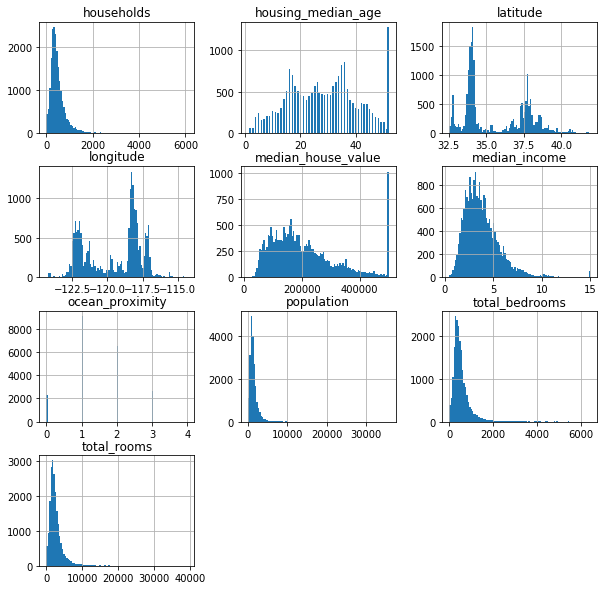

In [6]:
df.hist(bins=100,figsize=(10,10))
plt.show()

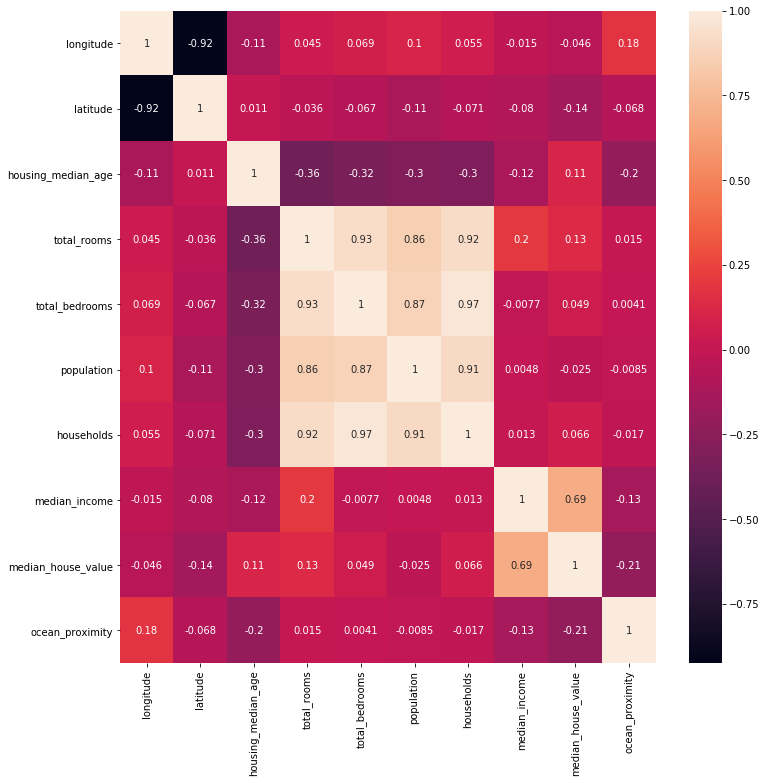

In [7]:
#time to scale the data but lets chcek the correlation first
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
#time to chose the warriors
#median_income, total_rooms, housing_median_age, ocean_proximity
#lets ignore the latitude for now
Y=df.median_house_value
df=df[['median_income','total_rooms','housing_median_age','ocean_proximity']]
print(df.describe())
scaler=StandardScaler()
columns=df.columns.tolist()
for i in columns:
    df[i]=scaler.fit_transform(df[i].values.reshape(-1,1))
print(df.describe())

       median_income   total_rooms  housing_median_age  ocean_proximity
count   20640.000000  20640.000000        20640.000000     20640.000000
mean        3.870671   2635.763081           28.639486         1.464729
std         1.899822   2181.615252           12.585558         0.854226
min         0.499900      2.000000            1.000000         0.000000
25%         2.563400   1447.750000           18.000000         1.000000
50%         3.534800   2127.000000           29.000000         1.000000
75%         4.743250   3148.000000           37.000000         2.000000
max        15.000100  39320.000000           52.000000         4.000000
       median_income   total_rooms  housing_median_age  ocean_proximity
count   2.064000e+04  2.064000e+04        2.064000e+04     2.064000e+04
mean    6.058892e-17  3.201573e-17        5.508083e-18     5.508083e-17
std     1.000024e+00  1.000024e+00        1.000024e+00     1.000024e+00
min    -1.774299e+00 -1.207283e+00       -2.196180e+00    -1.714

In [9]:
#LinearRegression
#after scaling the data lets get our models ready
train_data,test_data,train_labels,test_labels=train_test_split(df,Y,test_size=0.2, random_state=1)
train_scores=[]
test_scores=[]
train_mse_scores=[]
test_mse_scores=[]
model=LinearRegression()
model.fit(train_data,train_labels)
train_scores.append(model.score(train_data,train_labels))
train_mse_scores.append(mean_squared_log_error(train_labels,model.predict(train_data)))
test_scores.append(model.score(test_data,test_labels))
test_mse_scores.append(mean_squared_log_error(test_labels,model.predict(test_data)))
print(train_scores)
print(train_mse_scores)
print(test_scores)
print(test_mse_scores)

[0.5213600386413305]
[0.17151594250028984]
[0.5139519846398665]
[0.17537877305670493]


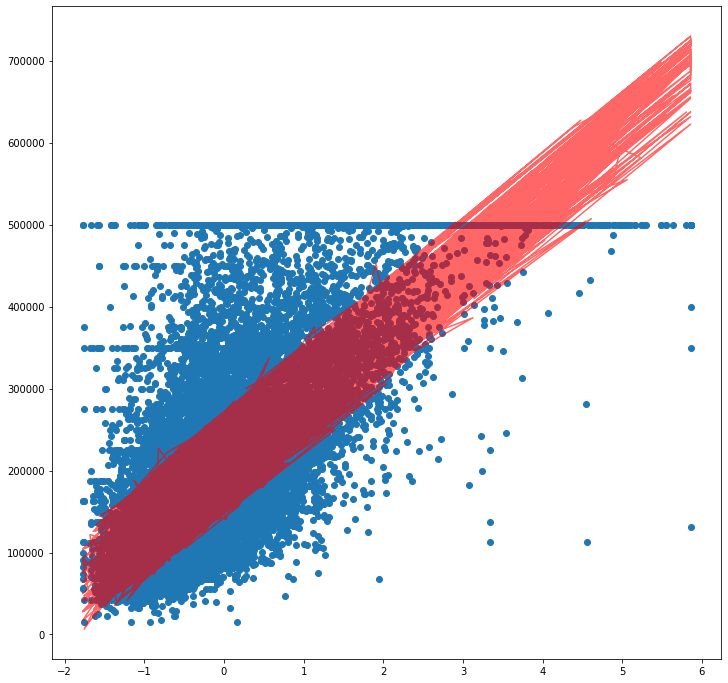

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(df['median_income'],Y)
plt.plot(df['median_income'],model.predict(df),color='red',alpha=0.6)
plt.show()

In [13]:
#RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_depth=15)
model.fit(train_data,train_labels)
train_scores.append(model.score(train_data,train_labels))
train_mse_scores.append(mean_squared_log_error(train_labels,model.predict(train_data)))
test_scores.append(model.score(test_data,test_labels))
test_mse_scores.append(mean_squared_log_error(test_labels,model.predict(test_data)))
print(train_scores)
print(train_mse_scores)
print(test_scores)
print(test_mse_scores)

[0.5213600386413305, 0.876778095731128]
[0.17151594250028984, 0.04643570180057477]
[0.5139519846398665, 0.633553151333656]
[0.17537877305670493, 0.11761541758288134]


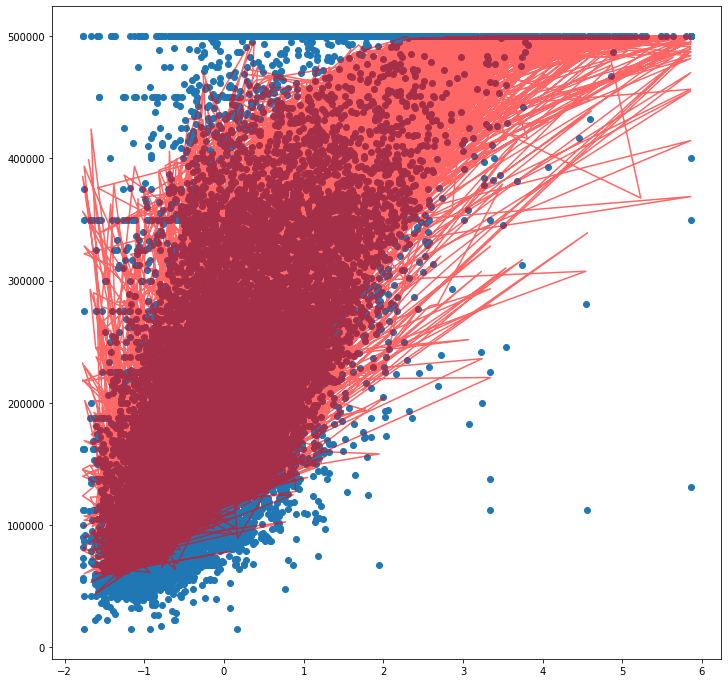

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(df['median_income'],Y)
plt.plot(df['median_income'],model.predict(df),color='red',alpha=0.6)
plt.show()

In [15]:
#KNeighbourRegressor
model=KNeighborsRegressor()
model.fit(train_data,train_labels)
train_scores.append(model.score(train_data,train_labels))
train_mse_scores.append(mean_squared_log_error(train_labels,model.predict(train_data)))
test_scores.append(model.score(test_data,test_labels))
test_mse_scores.append(mean_squared_log_error(test_labels,model.predict(test_data)))
print(train_scores)
print(train_mse_scores)
print(test_scores)
print(test_mse_scores)

[0.5213600386413305, 0.876778095731128, 0.7292813976748598]
[0.17151594250028984, 0.04643570180057477, 0.08366253104306524]
[0.5139519846398665, 0.633553151333656, 0.5914069023011308]
[0.17537877305670493, 0.11761541758288134, 0.13011843331405748]


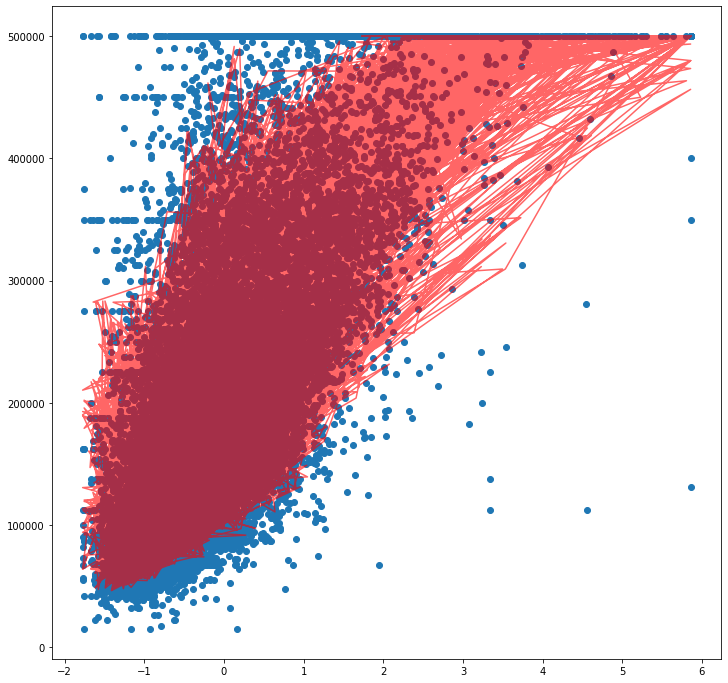

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(df['median_income'],Y)
plt.plot(df['median_income'],model.predict(df),color='red',alpha=0.6)
plt.show()

In [17]:
#SVR
model=SVR(kernel='poly')
model.fit(train_data,train_labels)
train_scores.append(model.score(train_data,train_labels))
train_mse_scores.append(mean_squared_log_error(train_labels,model.predict(train_data)))
test_scores.append(model.score(test_data,test_labels))
test_mse_scores.append(mean_squared_log_error(test_labels,model.predict(test_data)))
print(train_scores)
print(train_mse_scores)
print(test_scores)
print(test_mse_scores)

[0.5213600386413305, 0.876778095731128, 0.7292813976748598, 0.0052758530865452125]
[0.17151594250028984, 0.04643570180057477, 0.08366253104306524, 0.3072583065887377]
[0.5139519846398665, 0.633553151333656, 0.5914069023011308, 0.027868491939362028]
[0.17537877305670493, 0.11761541758288134, 0.13011843331405748, 0.31402347591996826]


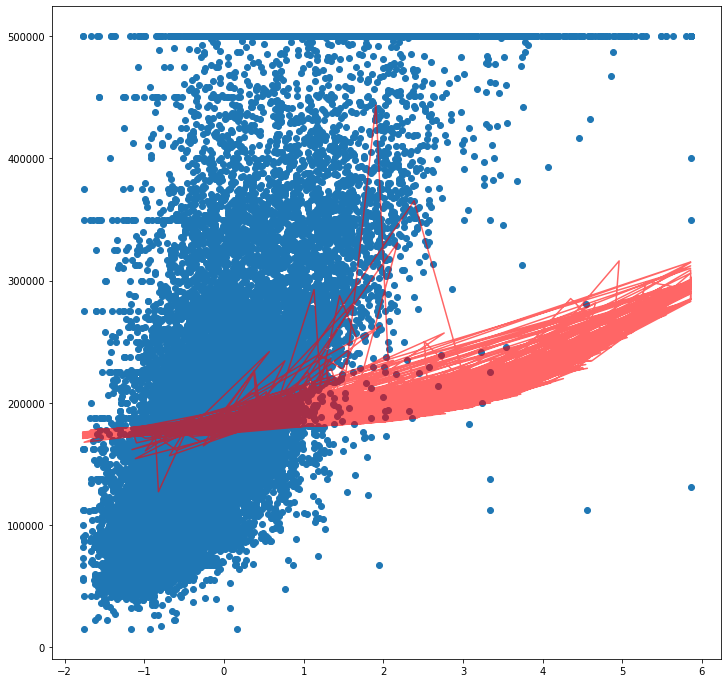

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(df['median_income'],Y)
plt.plot(df['median_income'],model.predict(df),color='red',alpha=0.6)
plt.show()

## SVM up to no good

Clearly we can see that SVM is the least accurate model and RandomForestRegressor is the most accurate model